In [8]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import time

Other funtions:

[https://www.sfu.ca/~ssurjano/optimization.html](https://www.sfu.ca/~ssurjano/optimization.html)

## **Class implementation**

In [9]:
# only one global minimum (-3.77, -3.28)
def fitness_himmel(chromosome: list[float, float]) -> float:
	x = chromosome[0]
	y = chromosome[1]
	fxy = (x**2 + y - 11)**2 + (x + y**2 -7)**2
	if x>0 or y>0: 
		fxy += 0.5
	return fxy

In [ ]:
class AG_Himmelblau():
    def __init__(self, population_size: int):
        self.population = [[random.uniform(-5, 5) for _ in range(2)] for _ in range(population_size)]
        self.fitnesses = []

    def sort_pop(self, fitness_function, reverse_sort: bool) -> tuple[list[list], list]:
        """Sort population by fitness function. Return tuple with population list and fitness list"""

        fitness_list = [fitness_function(ind) for ind in self.population]
        lista = sorted(zip(self.population, fitness_list), key=lambda x: x[1], reverse=reverse_sort)
        self.population = [x[0] for x in lista]
        self.fitnesses = [x[1] for x in lista]

    def select(self, T: int) -> list[float, float]:
        """Return a copy of an indivudual by tournament selection. Population already ordered by fitness"""

        choices=random.choices([*self.population], k=T)
        indices=[self.population.index(c) for c in choices]
        return self.population[np.argmin(indices)]

    def crossover(self, parent1: list[float, float], parent2: list[float, float], pcross: float) -> tuple[list,list]: 
        if random.random()<pcross:
            if random.random() < 0.5:
                child1 = [parent1[0], parent2[1]]
                child2 = [parent1[1], parent2[0]]
            else:
                child1 = [parent2[0], parent1[1]]
                child2 = [parent2[1], parent1[0]]
        else:
            child1, child2 = parent1[:], parent2[:]
        return child1, child2

    def mutate(self, individual: list[float, float], pmut: float) -> list[float, float]:
        if random.random()<pmut:
            individual[0], individual[1] = [random.uniform(-5, 5) for _ in range(2)]
        return individual

    def evolve(self, fitness_function, pmut=0.1, pcross=0.7, ngen=100, T=2, trace=50, reverse_sort=False, elitism=False) -> None:
        """Evolution procedure. Initial population already created"""

        size=len(self.population)
        for i in range(ngen):
            new_pop = []
            self.sort_pop(fitness_function, reverse_sort)
            if elitism:
                new_pop.append(self.population[0])
                new_pop.append(self.population[1])
            while len(new_pop) != size:   
                individual1 = self.select(T)
                individual2 = self.select(T)
                child1, child2 = self.crossover(individual1, individual2, pcross)
                mutated1 = self.mutate(child1, pmut)
                mutated2 = self.mutate(child2, pmut)
                new_pop.append(mutated1)
                new_pop.append(mutated2)
                
            self.population = [*new_pop] # make a copy

            if i % trace == 0 or i == ngen-1: # en la última gen se ordena
                self.sort_pop(fitness_function, reverse_sort)
                print(f"Nº gen: {i}, Best ind: {self.population[0]}, Best fitness: {self.fitnesses[0]:.3f}")

## **Visual test**

In [11]:
def himmelblau_test(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def plot_himmelblau(solution: list[float,float]):
    # grid of points
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = himmelblau_test(X, Y)

    # Create the surface plot
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Jet', showscale=False, opacity=0.8)])

    global_minima = [(3, 2), (-2.80, 3.13), (-3.77, -3.28), (3.58, -1.84)]
    for i, minimum in enumerate(global_minima): # plot minimum points
        x, y = minimum
        z = himmelblau_test(x, y)
        color = "purple" if i == 2 else "red"
        fig.add_trace(go.Scatter3d(
            x=[x], y=[y], z=[z],
            mode='markers',
            marker=dict(size=6, color=color, symbol='circle'),
            name=f'Minimum ({x}, {y})'
        ))

    # solution
    sol_x, sol_y = solution
    sol_z = himmelblau_test(sol_x, sol_y)  # Compute the Z-value for the solution
    fig.add_trace(go.Scatter3d(
        x=[sol_x], y=[sol_y], z=[sol_z],
        mode='markers',
        marker=dict(size=6, color="black", symbol='circle'),
        name=f'Solution ({sol_x:.3f}, {sol_y:.3f})'
    ))

    # Update layout
    fig.update_layout(
        title='Himmelblau Function',
        scene=dict(
            xaxis_title='X-axis',
            yaxis_title='Y-axis',
            zaxis_title='Z-axis'
        ),
        margin=dict(l=0, r=0, b=0, t=40),  # Adjust margins for better fit
        width=700,
        height=550,
        showlegend=True,
        legend=dict(
            x=1,
            y=1,
            xanchor='right',
            yanchor='top'
        )
    )

    fig.show()
# -----------------------------------------------
plot_himmelblau([1.0, 2.0])

## **---------------------------Tests---------------------------**

In [5]:
start = time.time()
genetic_algorithm = AG_Himmelblau(population_size=100) 
genetic_algorithm.evolve(fitness_function=fitness_himmel, pmut=0.1, ngen=1000, T=6, trace=100, reverse_sort=False)
minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")

plot_himmelblau(genetic_algorithm.population[0])

Nº gen: 0, Best ind: [2.972821581484898, 1.9087393311392926], Best fitness: 0.712
Nº gen: 100, Best ind: [-3.7133896352720552, -3.254867651283968], Best fitness: 0.231
Nº gen: 200, Best ind: [-3.7133896352720552, -3.254867651283968], Best fitness: 0.231
Nº gen: 300, Best ind: [-3.7133896352720552, -3.254867651283968], Best fitness: 0.231
Nº gen: 400, Best ind: [-3.7133896352720552, -3.254867651283968], Best fitness: 0.231
Nº gen: 500, Best ind: [-3.771103867502582, -3.27351004440008], Best fitness: 0.006
Nº gen: 600, Best ind: [-3.771103867502582, -3.27351004440008], Best fitness: 0.006
Nº gen: 700, Best ind: [-3.771103867502582, -3.27351004440008], Best fitness: 0.006
Nº gen: 800, Best ind: [-3.771103867502582, -3.27351004440008], Best fitness: 0.006
Nº gen: 900, Best ind: [-3.771103867502582, -3.27351004440008], Best fitness: 0.006
Nº gen: 999, Best ind: [-3.771103867502582, -3.27351004440008], Best fitness: 0.006
*******Tiempo transcurrido: 0 minutos y 1.67 segundos*******


## **3.5k fitness calls**

In [30]:
start = time.time()
genetic_algorithm = AG_Himmelblau(population_size=20)
genetic_algorithm.evolve(fitness_function=fitness_himmel, pmut=0.1, ngen=175, T=6, trace=50, reverse_sort=False)
minutos, segundos = divmod(time.time()-start, 60)
print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")

plot_himmelblau(genetic_algorithm.population[0])

Nº gen: 0, Best ind: [-2.742707519304447, 2.4979188192292856], Best fitness: 13.731
Nº gen: 50, Best ind: [-3.6452247173276553, -3.2279403755499314], Best fitness: 0.935
Nº gen: 100, Best ind: [-3.6452247173276553, -3.2279403755499314], Best fitness: 0.935
Nº gen: 150, Best ind: [-3.6452247173276553, -3.2279403755499314], Best fitness: 0.935
Nº gen: 174, Best ind: [-3.6452247173276553, -3.2279403755499314], Best fitness: 0.935
*******Tiempo transcurrido: 0 minutos y 0.02 segundos*******


## **Media de 10 ejecuciones**

In [32]:
def plot_mean_fitnesses(medidas: list[float]):
    media = np.mean(medidas)  
    min_val = min(medidas)    

    plt.figure(figsize=(8, 6))
    bars = plt.bar(
        range(len(medidas)),
        medidas,
        color=['green' if val == min_val else 'skyblue' for val in medidas],
        label='Medidas'
    )  # Barras

    plt.axhline(media, color='red', linestyle='--', label=f'Media ({media:.2f})')  # media

    # valor dentro de cada barra
    for i, bar in enumerate(bars):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Coordenada X
            bar.get_height() / 2,              # Coordenada Y
            f'{medidas[i]:.3f}',                   # Texto a mostrar
            ha='center', va='center',          # Alineación
            fontsize=10, color='black'         # Estilo del texto
        )

    plt.xticks(range(len(medidas)), labels=[f'E{i+1}' for i in range(len(medidas))])  # Etiquetas eje X
    plt.title('Ejecuciones Himmelblau', fontsize=14)
    plt.xlabel('Ejecuciones', fontsize=12)
    plt.ylabel('Fitnesses', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Línea de grilla horizontal

    plt.tight_layout()
    plt.show()

Nº gen: 0, Best ind: [-2.6289157353518364, 2.9432604119996872], Best fitness: 2.746
Nº gen: 174, Best ind: [-2.692019299383366, 3.098482114020042], Best fitness: 0.937
*******Tiempo transcurrido: 0 minutos y 0.02 segundos*******
Nº gen: 0, Best ind: [-2.5061053654469556, 3.3677458083764886], Best fitness: 5.697
Nº gen: 174, Best ind: [-3.8250324248585024, -3.1474246906803494], Best fitness: 1.078
*******Tiempo transcurrido: 0 minutos y 0.02 segundos*******
Nº gen: 0, Best ind: [3.0565866873511958, 2.102027008269123], Best fitness: 0.924
Nº gen: 174, Best ind: [-3.7722483491028482, -3.2320288745374426], Best fitness: 0.106
*******Tiempo transcurrido: 0 minutos y 0.02 segundos*******
Nº gen: 0, Best ind: [-3.224041490439312, -2.817585429860893], Best fitness: 16.940
Nº gen: 174, Best ind: [-3.7004762815044776, -3.1669614056650097], Best fitness: 0.674
*******Tiempo transcurrido: 0 minutos y 0.02 segundos*******
Nº gen: 0, Best ind: [2.2726944595447307, 2.1933088345953387], Best fitness: 

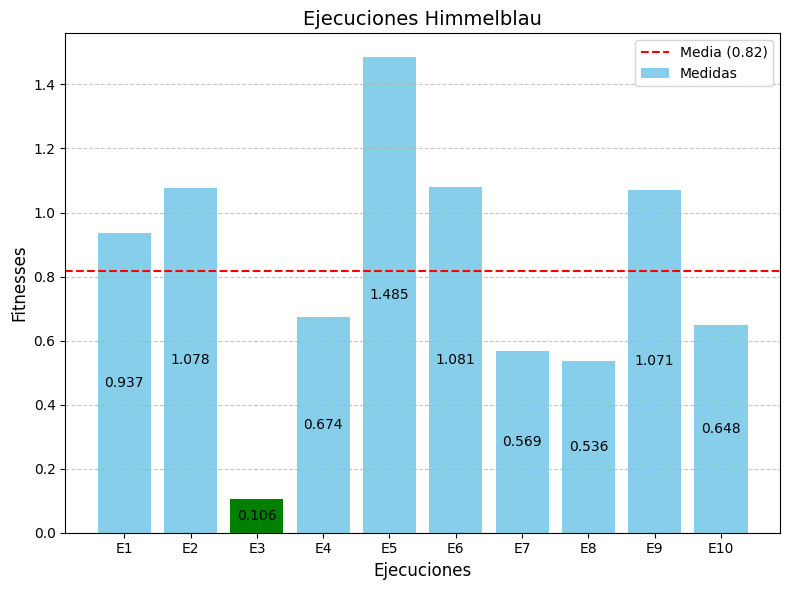

In [33]:
medidas_Himmel = []
individuos_Himmel = []

for i in range(1, 11):
    start = time.time()
    genetic_algorithm = AG_Himmelblau(population_size=20) 
    genetic_algorithm.evolve(fitness_function=fitness_himmel, pmut=0.1, ngen=175, T=6, trace=175, reverse_sort=False)
    minutos, segundos = divmod(time.time()-start, 60)
    print(f"*******Tiempo transcurrido: {int(minutos)} minutos y {segundos:.2f} segundos*******")
    medidas_Himmel.append(genetic_algorithm.fitnesses[0])
    individuos_Himmel.append(genetic_algorithm.population[0])

print("Best solution:")
best_index = medidas_Himmel.index(min(medidas_Himmel))
print(individuos_Himmel[best_index])
plot_mean_fitnesses(medidas_Himmel)

[-3.750189009648585, -3.2805526107307257]


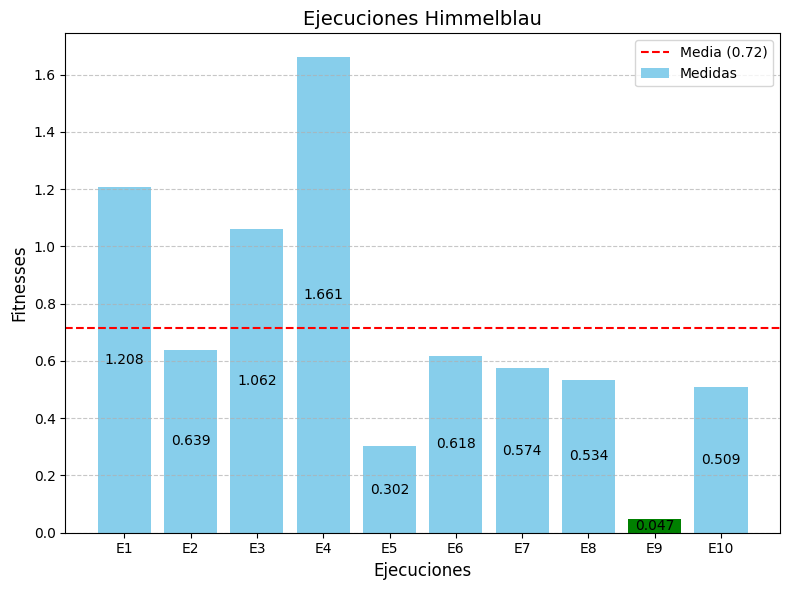

In [42]:
medidas_Himmel = []
individuos_Himmel = []

for i in range(1, 11):
    start = time.time()
    genetic_algorithm = AG_Himmelblau(population_size=20) 
    genetic_algorithm.evolve(fitness_function=fitness_himmel, pmut=0.15, ngen=175, T=6, trace=180, reverse_sort=False)
    minutos, segundos = divmod(time.time()-start, 60)
    medidas_Himmel.append(genetic_algorithm.fitnesses[0])
    individuos_Himmel.append(genetic_algorithm.population[0])

best_index = medidas_Himmel.index(min(medidas_Himmel))
print(individuos_Himmel[best_index])
plot_mean_fitnesses(medidas_Himmel)